# Lab 07-5 Fashion MNIST introduction
* https://www.tensorflow.org/tutorials/keras/basic_classification
### 기본 Library 선언 및 TensorFlow 버전 확인

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)

2.3.0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### 강의에 설명할 Data입니다
* Tensorflow 2.0 버전에 맞게 Keras를 활용한 Fashion MNIST를 분류 모델 생성

## 학습에 쓰이는 Data
| Label | Class       
| :------------- | :----------: 
| 0     | T-shirt/top 
| 1 | Trouser 
| 2 | Pullover 
| 3 | Dress
| 4 | Coat
| 5 | Sandal
| 6 | Shirt
| 7 | Sneaker
| 8 | Bag
| 9 | Ankle boot

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 5s 1us/step


*  Fashion MNIST Data 확인 - 4번째 배열 드레스

Pullover


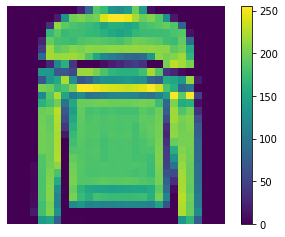

In [10]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.axis('off')
print(class_names[train_labels[5]])

###  Tensorflow Keras
#### 위 Data를 기준으로 분류 모델을 만들도록 하겠습니다
* 0~1사이의 값으로 정규화 및 Data 출력

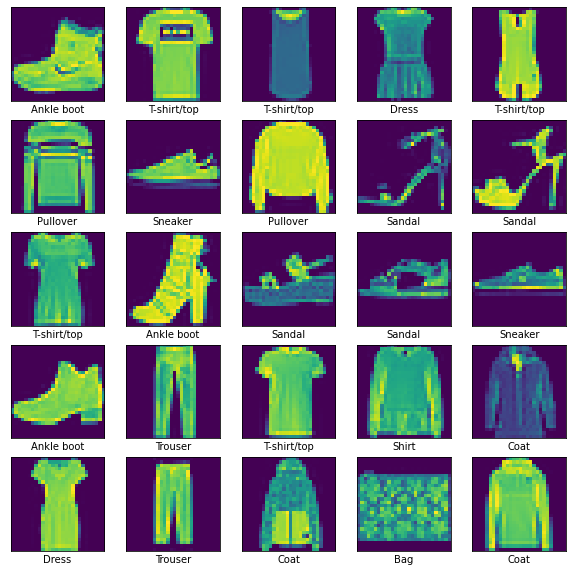

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])

* Tensorflow keras API를 통해 모델에 대한 정의


In [58]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


* Adam Optimizer과 Cross Entropy Loss 선언
* 5 Epoch로 학습할 Data로 학습 수행

In [60]:
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01,
                                                               decay_steps=1000,
                                                               decay_rate=0.96,
                                                               staircase=True)
logdir = './7-5.log'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, 
                    validation_data = (test_images, test_labels),
                    callbacks = [tensorboard_callback],
                    epochs=15)


Epoch 1/15
   1/1875 [..............................] - ETA: 0s - loss: 2.4522 - accuracy: 0.0312WARNING:tensorflow:From c:\users\jyush\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5278 - accuracy: 0.8130 - val_loss: 0.5038 - val_accuracy: 0.8203
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4257 - accuracy: 0.8480 - val_loss: 0.4417 - val_accuracy: 0.8439
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4013 - accuracy: 0.8563 - val_loss: 0.4591 - val_accuracy: 0.8406
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3819 - accuracy: 0.8605 - val_loss: 0.4320 - val_accuracy: 0.8517
Epoch 5/15
1875/1875 [=====

Let's see how the training goes

<AxesSubplot:xlabel='epoch'>

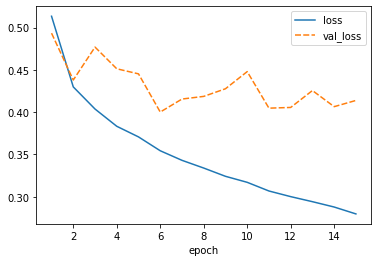

In [57]:
import seaborn as sns
epochs = [i + 1 for i in range(15)]
loss = history.history['loss']
val_loss = history.history['val_loss']
import pandas as pd
df_loss = pd.DataFrame(data = {'loss':loss, 'val_loss':val_loss}, index = epochs)
df_loss.index.name = 'epoch'
sns.lineplot(data = df_loss)



* 모델을 평가할 Test 데이타에 대한 정의

In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.8871
Test accuracy: 0.8870999813079834


# Learning rate을 추적하기 위해서 tensorboard를 이용하는 방법이 좋아 보인다. 
# 나중에 꼭 써보자
https://www.tensorflow.org/tensorboard/scalars_and_keras?hl=ko